In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [122]:
data=pd.read_csv("creditcard.csv")

In [123]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are many sampling techniques for balancing data. SMOTE is just one of them. But, there’s no single best technique. Generally, you need to experiment with a few of them before deciding on one. Make sure to check out the resources I attached above to learn about all the sampling techniques.

In [124]:
data.isnull().values.any()

False

No Null Values

**About the Data**

**To quote from Kaggle:**

"The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'."

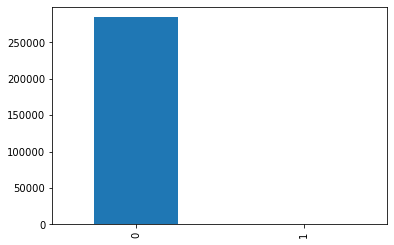

In [125]:
data['Class'].value_counts().plot.bar()

In [126]:
nfrad=data[data['Class']==0].shape[0]
frad=data[data['Class']==1].shape[0]
print("No of Non-Fraud transaction: {0}, No of Fraud Transcation of the data: {1}".format(nfrad,frad))
print("\n No of Non-Fraud transaction Proportion: {0},\n \n No of Fraud Transcation of the data:Proportion {1}".format((nfrad/(nfrad+frad)),(frad/(nfrad+frad))))

No of Non-Fraud transaction: 284315, No of Fraud Transcation of the data: 492

 No of Non-Fraud transaction Proportion: 0.9982725143693799,
 
 No of Fraud Transcation of the data:Proportion 0.001727485630620034


Lets drop the time feature

In [127]:
data.drop(['Time'],axis=1,inplace=True)

In [128]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [129]:
X=data.loc[:,data.columns!='Class']
y=data.loc[:,data.columns=='Class']

In [130]:
X.shape,y.shape

((284807, 29), (284807, 1))

In [131]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [132]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [138]:
y_train['Class'].value_counts()

0    190490
1       330
Name: Class, dtype: int64

In [108]:
y_test['Class'].value_counts()

0    93825
1      162
Name: Class, dtype: int64

In [59]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

## Without SMOTE

In [60]:
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9990933864374804
Accuracy score for Testing Dataset =  0.9993190547628927


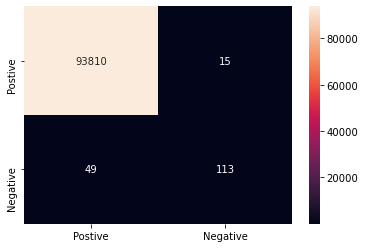

In [62]:
confusion_df=pd.DataFrame(confusion_matrix(y_test,test_pred),index=['Postive','Negative'],columns=['Postive','Negative'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.heatmap(confusion_df,annot=True,fmt='d')
plt.show()

In [111]:
#wrongly predicted
113/162

0.6975308641975309

so total 162 fraud transcations are there, out of which '49' deducted wrongly.

Using SMOTE:

In [64]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [66]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [145]:
pd.Series(y_train_smote).value_counts()

1    190490
0    190490
dtype: int64

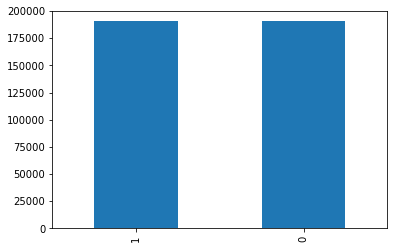

In [119]:
pd.Series(y_train_smote).value_counts().plot.bar()

In [73]:
# fit the model
clf.fit(X_train_smote, y_train_smote)

# prediction for Training data
train_pred_smote = clf.predict(X_train_smote)

# prediction for Testing data
test_pred_smote = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_smote, y_train_smote))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_smote, y_test))

Accuracy score for Training Dataset =  0.9570266155703712
Accuracy score for Testing Dataset =  0.9802632278932193


##### Our accuracy has reduced. But our model has definitely improved. Observe the confusion matrices.

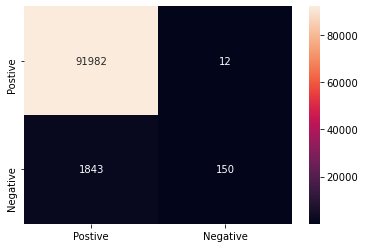

In [75]:
confusion_df=pd.DataFrame(confusion_matrix(test_pred_sm,y_test),index=['Postive','Negative'],columns=['Postive','Negative'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.heatmap(confusion_df,annot=True,fmt='d')
plt.show()

In [109]:
y_test['Class'].value_counts()

0    93825
1      162
Name: Class, dtype: int64

so total 162 fraud transcations are there, out of which '12' deducted wrongly. Which is improved significantly compared to Non-smote

## Near Miss- Undersampling

In [146]:
from imblearn.under_sampling import NearMiss

In [147]:
nm = NearMiss(random_state = 42)

In [150]:
X_train_nm, y_train_nm = nm.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [151]:
pd.Series(y_train_nm).value_counts()

1    330
0    330
dtype: int64

In [160]:
from collections import Counter
print("Original dataset shape{}".format(Counter(y_train['Class'].values)))
print("Original dataset shape{}".format(Counter(pd.Series(y_train_nm))))

Original dataset shapeCounter({0: 190490, 1: 330})
Original dataset shapeCounter({1: 330, 0: 330})


In [161]:
# fit the model
clf.fit(X_train_nm, y_train_nm)

# prediction for Training data
train_pred_nm = clf.predict(X_train_nm)

# prediction for Testing data
test_pred_nm = clf.predict(X_test)

In [162]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_nm, y_train_nm))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_nm, y_test))

Accuracy score for Training Dataset =  0.9803030303030303
Accuracy score for Testing Dataset =  0.23392596848500324


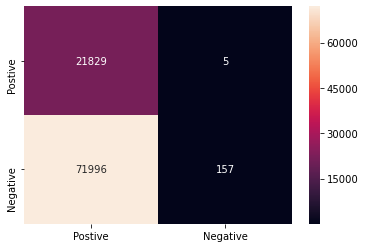

In [163]:
confusion_df=pd.DataFrame(confusion_matrix(test_pred_nm,y_test),index=['Postive','Negative'],columns=['Postive','Negative'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.heatmap(confusion_df,annot=True,fmt='d')
plt.show()